# Logistic Regression

Used as a method of classification.
Some examples:
- spam vs 'ham' emails
- loan default (yes/no)
- disease diagnosis
Above are all examples of binary classification

Logistic regression solves classification problems to predict discrete categories. You can't use linear regression model on binary group. Transform linear regression to logistic regression curve.

The sigmoid (logistic) function takes in any value and outputs it to be between 0 and 1. You can take linear regression solution and place it into the sigmoid function. We can setoff cutoff point at 0.5 anything below is class 0 and anything above is class 1. 

After you train a logistic regression model on training data, you will evaluate your model's performance on some test data. You can use a confusion matrix to evaluate classification models.

Terminology:
- True positive (TP)
- True negative (TN)
- False Positives (FP) predicted yes, actually no Type 1 error
- False Negatives (FN) predicted no, actually yes Type 2 error

(TP+TN)/total = accuracy, how often is it correct
(FP+FN)/total = misclassification rate, how often is it wrong

# Logistic Regression - Titanic Dataset
We will work with a cleaner version of the titanic dataset. We'll make a prediction on classification - survival or deceased. This is an example from Jose Portilla python for data science and machine learning on Udemy.

In [1]:
#import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# The data and exploratory data analysis

Let's explore and check out the data.

In [2]:
#read in the data
train = pd.read_csv('titanic_train.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Let's check out missing data

In [4]:
train.isnull().head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False


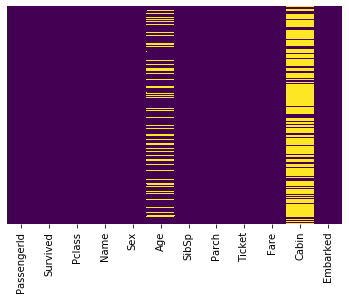

In [22]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Some age data is missing(roughly 20%), and a hefty amount of cabin data is missing. We will probably drop the cabin data later on. We can reasonably replace data for the age column with some form of imputation

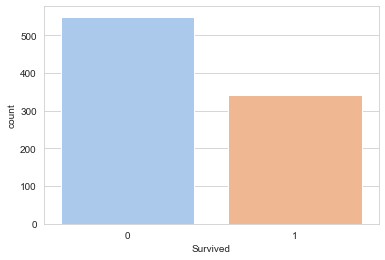

In [27]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train,palette='pastel')

Looks like more people did not survive.

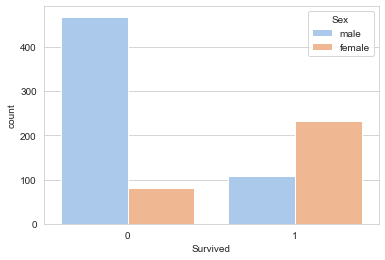

In [29]:
sns.countplot(x='Survived',data=train,palette='pastel', hue='Sex')

A whole lot more males did not survive. People that did survive were more than twice as likely to be females. This gives early signs that being female correlates to a higher chance of survival

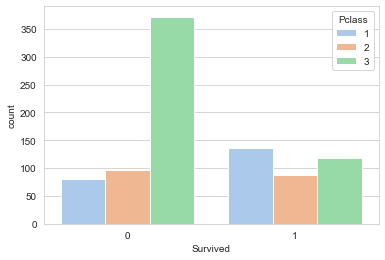

In [30]:
sns.countplot(x='Survived',data=train,palette='pastel', hue='Pclass')

Passengers in the third (lowest) class were overwhelmingly likely to not survive. Passengers that did survive leaned more towards the passengers in the first class.

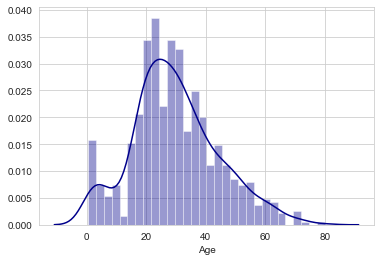

In [34]:
sns.distplot(train['Age'].dropna(),color='darkblue',bins=30)

Quite a skew for younger passengers, bimodal distribution.

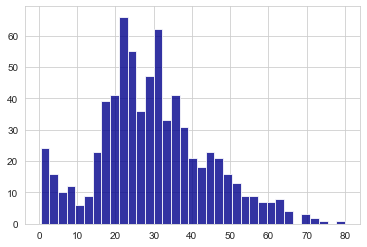

In [35]:
#another way to plot this data
train['Age'].hist(bins=35,color='darkblue', alpha=0.8)

In [36]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


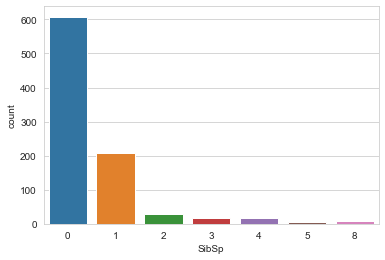

In [39]:
sns.countplot(x='SibSp', data=train)

Most people did not have siblings or spouses on board

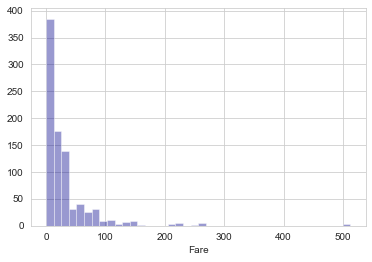

In [45]:
sns.distplot(train['Fare'].dropna(),color='darkblue',kde=False,bins=40)

This suggests that more people boarded with lower fare or as a class 3 passengers. We can check this with a quick countplot of the fare.

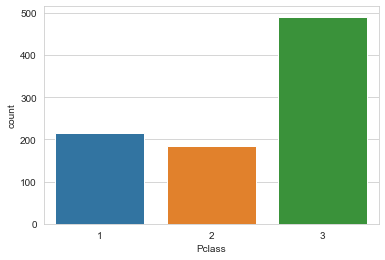

In [46]:
sns.countplot(x='Pclass',data=train)

#### Let's quickly checkout cufflinks for a more interactive plot of this data

In [50]:
import cufflinks as cf
cf.go_offline()

In [51]:
train['Fare'].iplot(kind='hist',bins=30,color='darkblue')

In [56]:
train['Age'].iplot(kind='hist',bins=35,color='darkblue')

# Data Cleaning
Next let's try to fill in the missing age, instead of completely dropping the missing age data rows. We can do this by filling in the mean age of all the passengers (imputation). However we should try to be more specific and be smarter. For example let's take the average age by passenger class. For example:

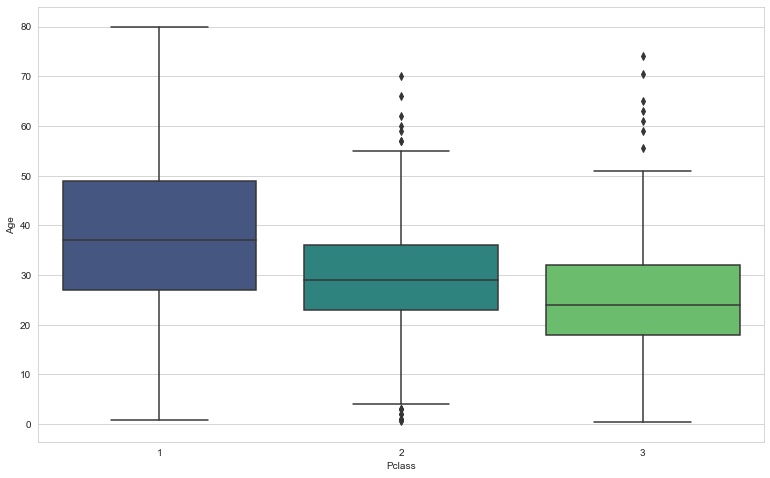

In [61]:
plt.figure(figsize=(13,8))
sns.boxplot(x="Pclass", y='Age', data=train, palette ='viridis')

We can then see that passengers in class 1 tend be older than those in lower classes. This makes sense as in order to be wealthy enough to be in Class 1, you might need to be older in order to accumulate all that money. We'll use these average age values to impute based on Pclass for Age.

In [59]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        
        if Pclass == 1:
            return 37
        
        elif Pclass == 2:
            return 29
        
        else:
            return 24
        
    else: 
        return Age

In [63]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

So what we did was create a function that taked an arguement cols which is a list. We set Age to be the first index, and Pclass to be the second. We checked first that if the age is null or missing a value, we replace it the average age that corresponded to the Passenger Class. If not null then simply return the old Age value it alreadu had. We then apply this function to the Age column in the train dataframe

Let's check the heatmap to see if we filled in the missing age values.

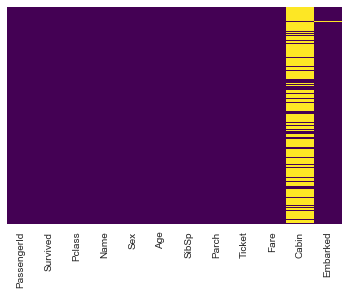

In [66]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Then let's just drop the cabin column as there is too much missing data for it.

In [67]:
train.drop('Cabin', axis=1,inplace=True)

In [68]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [69]:
train.dropna(inplace=True)

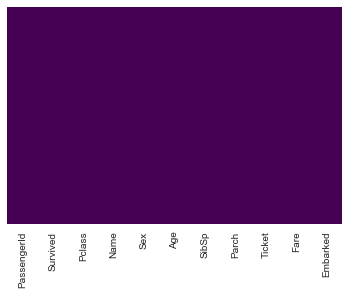

In [70]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Great! Now we have no more missing data.

# Converting Categorical Features
Now we need to convert categorical features into dummy variables using pandas. We should do this so that our machine learning algorithm can understand it and directly take it in as inputs.

In [71]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    889 non-null int64
Survived       889 non-null int64
Pclass         889 non-null int64
Name           889 non-null object
Sex            889 non-null object
Age            889 non-null float64
SibSp          889 non-null int64
Parch          889 non-null int64
Ticket         889 non-null object
Fare           889 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


Let's turn sex and embark into dummy variables

In [77]:
sex = pd.get_dummies(train['Sex'],drop_first=True)
embark = pd.get_dummies(train['Embarked'],drop_first=True)

In [79]:
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [80]:
train = pd.concat([train,sex,embark],axis=1)

In [81]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [83]:
train.drop('PassengerId',axis=1,inplace=True)

Great now our data is ready for our model!

# Building a Logistic Regression Model
Let's start by splitting our data into a **training set** and **test set.**

In [84]:
from sklearn.model_selection import train_test_split

In [87]:
X = train.drop('Survived',axis=1)
y = train['Survived']

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [89]:
from sklearn.linear_model import LogisticRegression

In [90]:
logmodel = LogisticRegression()

In [98]:
logmodel.fit(X_train,y_train)

C:\Users\markb\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [99]:
predictions = logmodel.predict(X_test)

We have now createn a model, fit a model, and predict a model.

# Evaluation
We can check precision, recall, f-1 score using classification report

In [100]:
from sklearn.metrics import classification_report

In [101]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.80      0.91      0.85       163
           1       0.82      0.65      0.73       104

    accuracy                           0.81       267
   macro avg       0.81      0.78      0.79       267
weighted avg       0.81      0.81      0.80       267



From the classification chart:
- Roughly 81% of the predictions were correct.
- 81% of positive cases were predicted correctly.

Confusion matrix:

In [102]:
from sklearn.metrics import confusion_matrix

In [103]:
print(confusion_matrix(y_test,predictions))

[[148  15]
 [ 36  68]]
